In [ ]:
from google.colab import files

# Upload the files
uploaded = files.upload()

Saving adjacency.csv to adjacency (5).csv
Saving metrics.py to metrics (5).py
Saving gcnLayer.py to gcnLayer.py
Saving load_data.py to load_data (5).py
Saving out_30min.csv to out_30min (5).csv
Saving out_15min.csv to out_15min (5).csv
Saving out_10min.csv to out_10min (5).csv
Saving 30 min after normolization.csv to 30 min after normolization (5).csv
Saving 15 min after normolization.csv to 15 min after normolization (5).csv
Saving 10 min after normolization.csv to 10 min after normolization (5).csv
Saving in_30min.csv to in_30min (5).csv
Saving in_15min.csv to in_15min (5).csv
Saving in_10min.csv to in_10min (5).csv


In [ ]:
import os

# List files in the current directory
print(os.listdir())

['.config', '30 min after normolization (2).csv', 'in_10min (3).csv', 'out_15min (1).csv', 'in_30min.csv', '10 min after normolization (3).csv', 'in_15min.csv', 'adjacency (2).csv', '10 min after normolization (2).csv', 'metrics (3).py', 'out_10min.csv', 'out_10min (4).csv', 'out_30min (3).csv', 'out_15min (5).csv', 'in_15min (2).csv', '15 min after normolization (1).csv', 'out_10min (2).csv', '30 min after normolization (4).csv', 'in_10min (4).csv', 'metrics.py', '10 min after normolization (4).csv', '30 min after normolization (3).csv', 'load_data (4).py', 'adjacency (4).csv', 'out_30min (5).csv', '15 min after normolization (3).csv', 'metrics (1).py', 'in_15min (3).csv', '30 min after normolization (1).csv', 'out_30min (4).csv', 'gcnLayer.py', '10 min after normolization.csv', 'gcn (1).py', 'adjacency (5).csv', 'in_10min (1).csv', 'gcn (2).py', 'gcn.py', 'adjacency (1).csv', 'in_30min (1).csv', 'in_30min (3).csv', 'in_15min (4).csv', 'metrics (5).py', '15 min after normolization.csv

# **10** **MINUTES**

In [ ]:
import numpy as np
import csv
from load_data import Get_All_Data
from gcnLayer import GraphConvolution1
from metrics import evaluate_performance
import matplotlib.pyplot as plt
from keras.layers import Input, Reshape, Conv3D, Dense, Flatten
from keras.models import Model
from keras.optimizers import Adam
from keras.regularizers import l2
import time
import keras

# Function to load data and adjacency matrix
def load_data():
    X_train_1, Y_train, X_test_1, Y_test, Y_test_original, a, b, X_train_2, X_test_2, X_train_3, X_test_3, X_train_4, X_test_4 = \
        Get_All_Data(TG=10, time_lag=11, TG_in_one_day=36, forecast_day_number=5, TG_in_one_week=180)

    adjacency = []
    with open('adjacency.csv') as f:
        data = csv.reader(f, delimiter=",")
        for line in data:
            line = [float(x) for x in line]
            adjacency.append(line)
    adjacency = np.array(adjacency, dtype=np.float32)

    return X_train_1, Y_train, X_test_1, Y_test, Y_test_original, a, b, X_train_2, X_test_2, adjacency

# Load the data
X_train_1, Y_train, X_test_1, Y_test, Y_test_original, a, b, X_train_2, X_test_2, adjacency = load_data()


(2330, 276, 30) (2330, 276)
(170, 276, 30) (170, 276)
(170, 276)
3188 0
(2330, 276, 30)
(170, 276, 30)
(276, 276)
(2330, 276, 10)
(170, 276, 10)
(2330, 11, 10)
(170, 11, 10)


In [ ]:
# Define GCN model
def create_gcn_model(adjacency):
    input1 = Input(shape=(X_train_1.shape[1], X_train_1.shape[2]))
    out1 = GraphConvolution1(15, adj=adjacency, activation='relu', kernel_regularizer=l2(5e-4))(input1)
    out1 = Reshape((276, 5, 3, 1), input_shape=(276, 15))(out1)

    input2 = Input(shape=(X_train_2.shape[1], X_train_2.shape[2]), name='input2')
    out2 = GraphConvolution1(15, adj=adjacency, activation='relu', kernel_regularizer=l2(5e-4))(input2)
    out2 = Reshape((276, 5, 3, 1), input_shape=(276, 15))(out2)

    out = keras.layers.concatenate([out1, out2], axis=4)
    out = Conv3D(16, kernel_size=3, padding='same', activation='relu')(out)
    out = Flatten()(out)
    out = Dense(276)(out)

    model = Model(inputs=[input1, input2], outputs=[out])
    model.compile(loss='mse', optimizer=Adam(lr=0.001))

    return model

# Create and train GCN model
gcn_model = create_gcn_model(adjacency)
gcn_model.fit([X_train_1, X_train_2], Y_train, batch_size=64, epochs=80, verbose=1)

Epoch 1/80
37/37 [==============================] - 41s 1s/step - loss: 0.0715
Epoch 2/80
37/37 [==============================] - 29s 783ms/step - loss: 0.0188
Epoch 3/80
37/37 [==============================] - 29s 791ms/step - loss: 0.0167
Epoch 4/80
37/37 [==============================] - 29s 776ms/step - loss: 0.0154
Epoch 5/80
37/37 [==============================] - 29s 787ms/step - loss: 0.0142
Epoch 6/80
37/37 [==============================] - 30s 803ms/step - loss: 0.0132
Epoch 7/80
37/37 [==============================] - 30s 805ms/step - loss: 0.0124
Epoch 8/80
37/37 [==============================] - 30s 801ms/step - loss: 0.0116
Epoch 9/80
37/37 [==============================] - 29s 797ms/step - loss: 0.0109
Epoch 10/80
37/37 [==============================] - 29s 773ms/step - loss: 0.0102
Epoch 11/80
37/37 [==============================] - 28s 768ms/step - loss: 0.0097
Epoch 12/80
37/37 [==============================] - 29s 780ms/step - loss: 0.0091
Epoch 13/80
37/3

6/6 [==============================] - 0s 15ms/step
Model RMSE: 33.000759396841254
Performing ADF test on residuals:
ADF Statistic: -17.245395
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
Reject Null Hypothesis (H0): Time series is stationary


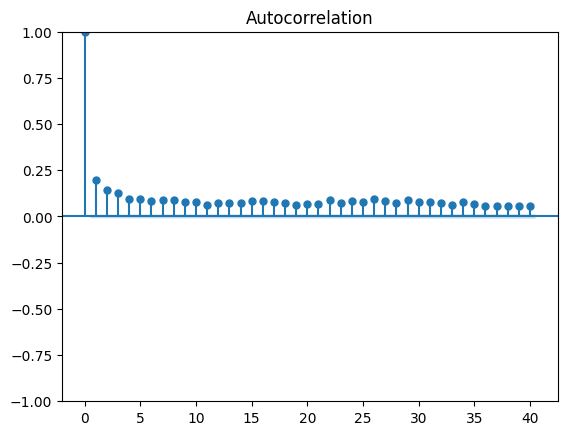

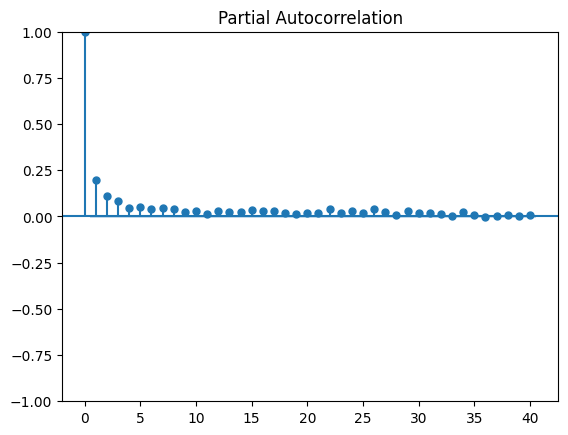

In [ ]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error


gcn_predictions = gcn_model.predict([X_test_1, X_test_2], verbose=1)
gcn_predictions = gcn_predictions.reshape(-1, 276)
gcn_predictions = gcn_predictions * a

residuals = Y_test_original - gcn_predictions
rmse = np.sqrt(mean_squared_error(Y_test_original, gcn_predictions))
print("Model RMSE:", rmse)

# Perform ADF test on residuals
def adf_test(residuals):
    result = adfuller(residuals.flatten())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if result[1] <= 0.05:
        print("Reject Null Hypothesis (H0): Time series is stationary")
    else:
        print("Fail to Reject Null Hypothesis (H0): Time series is non-stationary")

# Perform ADF test on residuals
print("Performing ADF test on residuals:")
adf_test(residuals)

# Compute ACF and PACF
acf = sm.graphics.tsa.plot_acf(residuals.flatten(), lags=40, alpha=0.05)
pacf = sm.graphics.tsa.plot_pacf(residuals.flatten(), lags=40, alpha=0.05)

# Display plots
plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
def train_arima(residuals):
    arima_model = ARIMA(residuals.flatten(), order=(1, 0, 1))  # Adjust the order as needed
    arima_result = arima_model.fit()
    return arima_result

arima_result_on_residuals = train_arima(residuals)
print(arima_result_on_residuals.summary())

# Make ARIMA predictions
arima_predictions = arima_result_on_residuals.predict(start=0, end=len(residuals.flatten())-1)
arima_predictions = arima_predictions.reshape(residuals.shape)

# Combine GCN and ARIMA predictions
final_predictions = gcn_predictions + arima_predictions

evaluate_performance(Y_test_original,final_predictions)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                46920
Model:                 ARIMA(1, 0, 1)   Log Likelihood             -228750.233
Date:                Fri, 05 Jul 2024   AIC                         457508.466
Time:                        16:57:13   BIC                         457543.491
Sample:                             0   HQIC                        457519.470
                              - 46920                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0045      0.500      6.007      0.000       2.024       3.985
ar.L1          0.9684      0.002    624.779      0.000       0.965       0.971
ma.L1         -0.9003      0.003   -344.393      0.0

(31.7021533700681, 0.9199666952251966, 18.789855482221196, 0.1070731713510924)

In [ ]:
from keras.callbacks import Callback
class RMSECallback(Callback):
    def __init__(self, X_test_1, X_test_2, Y_test_original):
        self.X_test_1 = X_test_1
        self.X_test_2 = X_test_2
        self.Y_test_original = Y_test_original
        self.rmse = []

    def on_epoch_end(self, epoch, logs=None):
        gcn_predictions = self.model.predict([self.X_test_1, self.X_test_2], verbose=0)
        gcn_predictions = gcn_predictions.reshape(-1, 276)
        gcn_predictions = gcn_predictions * a  # Replace with actual scaling factor if applicable
        residuals = self.Y_test_original - gcn_predictions
        rmse = np.sqrt(mean_squared_error(self.Y_test_original, gcn_predictions))
        self.rmse.append(rmse)
        print(f'Epoch {epoch + 1} RMSE: {rmse}')

rmse_callback = RMSECallback(X_test_1, X_test_2, Y_test_original)

# Train the model with the RMSE callback
history = gcn_model.fit([X_train_1, X_train_2], Y_train, batch_size=64, epochs=80, verbose=1, callbacks=[rmse_callback])


Epoch 1/80
37/37 [==============================] - 1s 22ms/step - loss: 3.3921e-04
Epoch 2/80
37/37 [==============================] - 1s 16ms/step - loss: 3.2149e-04
Epoch 3/80
37/37 [==============================] - 1s 14ms/step - loss: 3.0839e-04
Epoch 4/80
37/37 [==============================] - 1s 15ms/step - loss: 2.9660e-04
Epoch 5/80
37/37 [==============================] - 1s 15ms/step - loss: 2.8622e-04
Epoch 6/80
37/37 [==============================] - 1s 14ms/step - loss: 2.7544e-04
Epoch 7/80
37/37 [==============================] - 1s 14ms/step - loss: 2.6759e-04
Epoch 8/80
37/37 [==============================] - 1s 14ms/step - loss: 2.5244e-04
Epoch 9/80
37/37 [==============================] - 1s 15ms/step - loss: 2.4537e-04
Epoch 10/80
37/37 [==============================] - 1s 14ms/step - loss: 2.3780e-04
Epoch 11/80
37/37 [==============================] - 1s 15ms/step - loss: 2.2882e-04
Epoch 12/80
37/37 [==============================] - 1s 14ms/step - loss: 

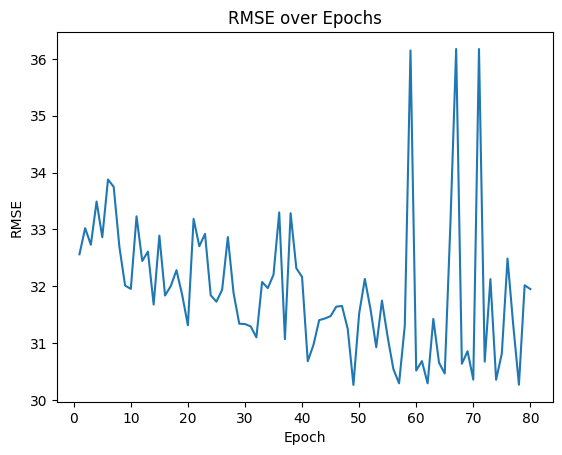

Maximum RMSE 36.17524077508312
Minimum RMSE 30.26684569496392


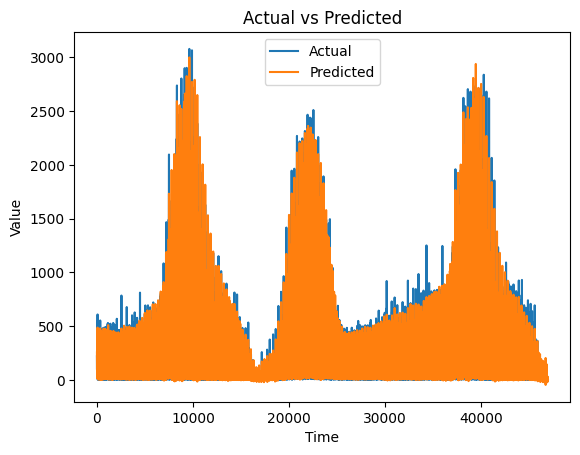

In [ ]:
# Plot RMSE over epochs
plt.plot(range(1, len(rmse_callback.rmse) + 1), rmse_callback.rmse)
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('RMSE over Epochs')
plt.show()

print("Maximum RMSE", max(rmse_callback.rmse))
print("Minimum RMSE",min(rmse_callback.rmse))
# Plot RMSE over epochs for GCN training
rmse_gcn = np.sqrt(mean_squared_error(Y_test_original, gcn_predictions))


# Plot the final combined predictions
plt.plot(Y_test_original.flatten(), label='Actual')
plt.plot(final_predictions.flatten(), label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

# **15** **MINUTES**

In [ ]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from load_data import Get_All_Data
from gcnLayer import GraphConvolution1
from metrics import evaluate_performance
from keras.layers import Input, Reshape, Conv3D, Dense, Flatten
from keras.models import Model
from keras.optimizers import Adam
from keras.regularizers import l2
import time
import keras
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# Function to load data and adjacency matrix
def load_data():
    X_train_1, Y_train, X_test_1, Y_test, Y_test_original, a, b, X_train_2, X_test_2, X_train_3, X_test_3, X_train_4, X_test_4 = \
        Get_All_Data(TG=15, time_lag=11, TG_in_one_day=36, forecast_day_number=5, TG_in_one_week=180)

    adjacency = []
    with open('adjacency.csv') as f:
        data = csv.reader(f, delimiter=",")
        for line in data:
            line = [float(x) for x in line]
            adjacency.append(line)
    adjacency = np.array(adjacency, dtype=np.float32)

    return X_train_1, Y_train, X_test_1, Y_test, Y_test_original, a, b, X_train_2, X_test_2, adjacency

# Load the data
X_train_1, Y_train, X_test_1, Y_test, Y_test_original, a, b, X_train_2, X_test_2, adjacency = load_data()


(1430, 276, 30) (1430, 276)
(170, 276, 30) (170, 276)
(170, 276)
4744 0
(1430, 276, 30)
(170, 276, 30)
(276, 276)
(1430, 276, 10)
(170, 276, 10)
(1430, 11, 10)
(170, 11, 10)


In [ ]:
def create_gcn_model(adjacency):
    input1 = Input(shape=(X_train_1.shape[1], X_train_1.shape[2]))
    out1 = GraphConvolution1(15, adj=adjacency, activation='relu', kernel_regularizer=l2(5e-4))(input1)
    out1 = Reshape((276, 5, 3, 1), input_shape=(276, 15))(out1)

    input2 = Input(shape=(X_train_2.shape[1], X_train_2.shape[2]), name='input2')
    out2 = GraphConvolution1(15, adj=adjacency, activation='relu', kernel_regularizer=l2(5e-4))(input2)
    out2 = Reshape((276, 5, 3, 1), input_shape=(276, 15))(out2)

    out = keras.layers.concatenate([out1, out2], axis=4)
    out = Conv3D(16, kernel_size=3, padding='same', activation='relu')(out)
    out = Flatten()(out)
    out = Dense(276)(out)

    model = Model(inputs=[input1, input2], outputs=[out])
    model.compile(loss='mse', optimizer=Adam(lr=0.001))

    return model

# Create and train GCN model
gcn_model = create_gcn_model(adjacency)
gcn_model.fit([X_train_1, X_train_2], Y_train, batch_size=64, epochs=80, verbose=1)


Epoch 1/80
23/23 [==============================] - 1s 21ms/step - loss: 0.3910
Epoch 2/80
23/23 [==============================] - 0s 12ms/step - loss: 0.0368
Epoch 3/80
23/23 [==============================] - 0s 13ms/step - loss: 0.0212
Epoch 4/80
23/23 [==============================] - 0s 14ms/step - loss: 0.0189
Epoch 5/80
23/23 [==============================] - 0s 13ms/step - loss: 0.0178
Epoch 6/80
23/23 [==============================] - 0s 13ms/step - loss: 0.0168
Epoch 7/80
23/23 [==============================] - 0s 14ms/step - loss: 0.0160
Epoch 8/80
23/23 [==============================] - 0s 14ms/step - loss: 0.0154
Epoch 9/80
23/23 [==============================] - 0s 13ms/step - loss: 0.0149
Epoch 10/80
23/23 [==============================] - 0s 14ms/step - loss: 0.0145
Epoch 11/80
23/23 [==============================] - 0s 15ms/step - loss: 0.0141
Epoch 12/80
23/23 [==============================] - 0s 13ms/step - loss: 0.0137
Epoch 13/80
23/23 [==================

6/6 [==============================] - 0s 3ms/step
Model RMSE: 47.2180259842872
Performing ADF test on residuals:
ADF Statistic: -15.771530
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
Reject Null Hypothesis (H0): Time series is stationary


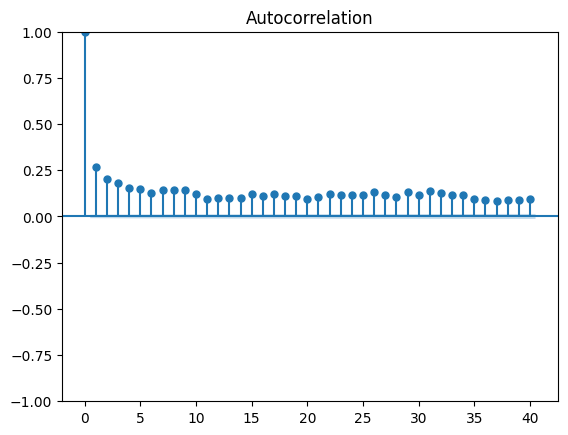

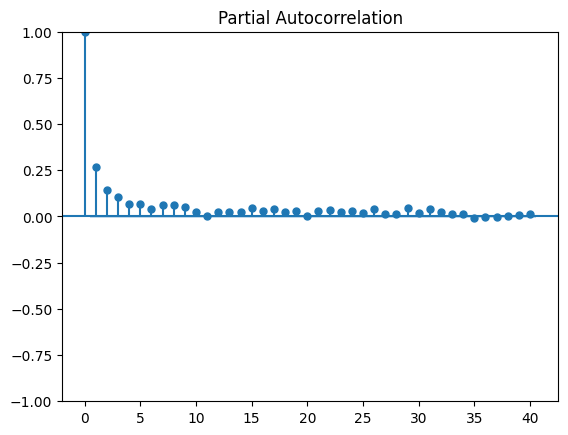

In [ ]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error


gcn_predictions = gcn_model.predict([X_test_1, X_test_2], verbose=1)
gcn_predictions = gcn_predictions.reshape(-1, 276)
gcn_predictions = gcn_predictions * a

residuals = Y_test_original - gcn_predictions
rmse = np.sqrt(mean_squared_error(Y_test_original, gcn_predictions))
print("Model RMSE:", rmse)

# Perform ADF test on residuals
def adf_test(residuals):
    result = adfuller(residuals.flatten())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if result[1] <= 0.05:
        print("Reject Null Hypothesis (H0): Time series is stationary")
    else:
        print("Fail to Reject Null Hypothesis (H0): Time series is non-stationary")

# Perform ADF test on residuals
print("Performing ADF test on residuals:")
adf_test(residuals)

# Compute ACF and PACF
acf = sm.graphics.tsa.plot_acf(residuals.flatten(), lags=40, alpha=0.05)
pacf = sm.graphics.tsa.plot_pacf(residuals.flatten(), lags=40, alpha=0.05)

# Display plots
plt.show()

In [ ]:
def train_arima(residuals):
    arima_model = ARIMA(residuals.flatten(), order=(1, 0, 1))  # Adjust the order as needed
    arima_result = arima_model.fit()
    return arima_result

arima_result_on_residuals = train_arima(residuals)
print(arima_result_on_residuals.summary())

# Make ARIMA predictions
arima_predictions = arima_result_on_residuals.predict(start=0, end=len(residuals.flatten())-1)
arima_predictions = arima_predictions.reshape(residuals.shape)

# Combine GCN and ARIMA predictions
final_predictions = gcn_predictions + arima_predictions

evaluate_performance(Y_test_original,final_predictions)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                46920
Model:                 ARIMA(1, 0, 1)   Log Likelihood             -243915.785
Date:                Fri, 05 Jul 2024   AIC                         487839.571
Time:                        17:01:52   BIC                         487874.596
Sample:                             0   HQIC                        487850.575
                              - 46920                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.3851      0.661    -11.180      0.000      -8.680      -6.090
ar.L1          0.9454      0.002    423.789      0.000       0.941       0.950
ma.L1         -0.8263      0.004   -234.747      0.0

(43.798775346177784,
 0.9135092679702125,
 26.774758556599988,
 0.09845972880925746)

In [ ]:
from keras.callbacks import Callback
class RMSECallback(Callback):
    def __init__(self, X_test_1, X_test_2, Y_test_original):
        self.X_test_1 = X_test_1
        self.X_test_2 = X_test_2
        self.Y_test_original = Y_test_original
        self.rmse = []

    def on_epoch_end(self, epoch, logs=None):
        gcn_predictions = self.model.predict([self.X_test_1, self.X_test_2], verbose=0)
        gcn_predictions = gcn_predictions.reshape(-1, 276)
        gcn_predictions = gcn_predictions * a  # Replace with actual scaling factor if applicable
        residuals = self.Y_test_original - gcn_predictions
        rmse = np.sqrt(mean_squared_error(self.Y_test_original, gcn_predictions))
        self.rmse.append(rmse)
        print(f'Epoch {epoch + 1} RMSE: {rmse}')

rmse_callback = RMSECallback(X_test_1, X_test_2, Y_test_original)

# Train the model with the RMSE callback
history = gcn_model.fit([X_train_1, X_train_2], Y_train, batch_size=64, epochs=80, verbose=1, callbacks=[rmse_callback])

Epoch 1/80
 5/23 [=====>........................] - ETA: 0s - loss: 0.0033

23/23 [==============================] - 0s 18ms/step - loss: 0.0033
Epoch 2/80
23/23 [==============================] - 0s 16ms/step - loss: 0.0032
Epoch 3/80
23/23 [==============================] - 0s 16ms/step - loss: 0.0032
Epoch 4/80
23/23 [==============================] - 0s 16ms/step - loss: 0.0031
Epoch 5/80
23/23 [==============================] - 0s 17ms/step - loss: 0.0030
Epoch 6/80
23/23 [==============================] - 0s 16ms/step - loss: 0.0030
Epoch 7/80
23/23 [==============================] - 0s 16ms/step - loss: 0.0029
Epoch 8/80
23/23 [==============================] - 0s 16ms/step - loss: 0.0028
Epoch 9/80
23/23 [==============================] - 0s 16ms/step - loss: 0.0028
Epoch 10/80
23/23 [==============================] - 0s 16ms/step - loss: 0.0027
Epoch 11/80
23/23 [==============================] - 0s 18ms/step - loss: 0.0027
Epoch 12/80
23/23 [==============================] - 0s 17ms/step - loss: 0.0026
Epoch 13/80
23/23 [=============================

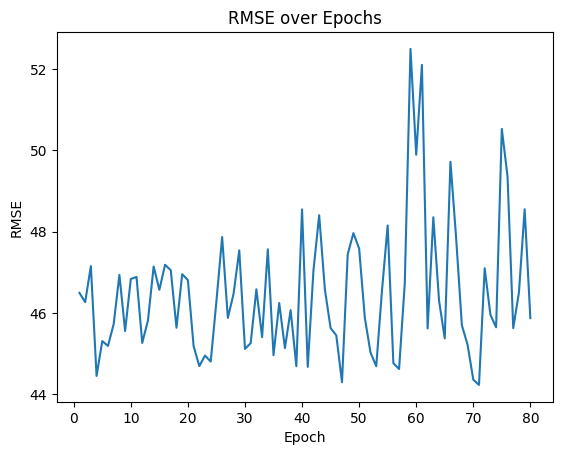

Maximum RMSE 52.49130558430892
Minimum RMSE 44.23312710052445


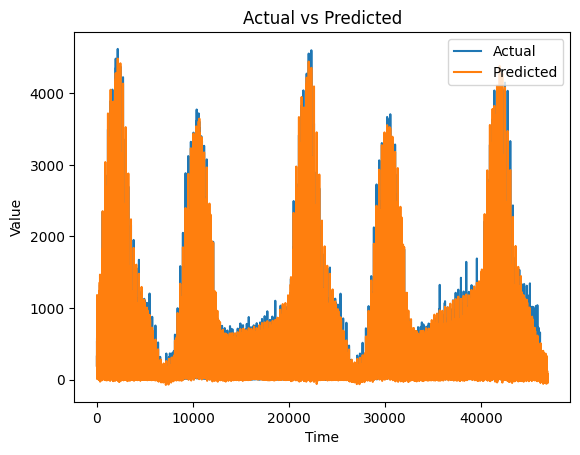

In [ ]:
# Plot RMSE over epochs
plt.plot(range(1, len(rmse_callback.rmse) + 1), rmse_callback.rmse)
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('RMSE over Epochs')
plt.show()

print("Maximum RMSE", max(rmse_callback.rmse))
print("Minimum RMSE",min(rmse_callback.rmse))
# Plot RMSE over epochs for GCN training
rmse_gcn = np.sqrt(mean_squared_error(Y_test_original, gcn_predictions))


# Plot the final combined predictions
plt.plot(Y_test_original.flatten(), label='Actual')
plt.plot(final_predictions.flatten(), label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

# **30** **MINUTES**

In [ ]:
import numpy as np
import csv
from load_data import Get_All_Data
from metrics import evaluate_performance
import matplotlib.pyplot as plt
from keras.layers import Input, Reshape, Conv3D, Dense, Flatten
from keras.models import Model
from keras.optimizers import Adam
from keras.regularizers import l2
import time
import keras
begintime = time.time()

def load_data():
    X_train_1, Y_train, X_test_1, Y_test, Y_test_original, a, b, X_train_2, X_test_2, X_train_3, X_test_3, X_train_4, X_test_4 = \
        Get_All_Data(TG=30, time_lag=11, TG_in_one_day=36, forecast_day_number=5, TG_in_one_week=180)

    adjacency = []
    with open('adjacency.csv') as f:
        data = csv.reader(f, delimiter=",")
        for line in data:
            line = [float(x) for x in line]
            adjacency.append(line)
    adjacency = np.array(adjacency, dtype=np.float32)

    return X_train_1, Y_train, X_test_1, Y_test, Y_test_original, a, b, X_train_2, X_test_2, adjacency

# Load the data
X_train_1, Y_train, X_test_1, Y_test, Y_test_original, a, b, X_train_2, X_test_2, adjacency = load_data()


(530, 276, 30) (530, 276)
(170, 276, 30) (170, 276)
(170, 276)
8940 0
(530, 276, 30)
(170, 276, 30)
(276, 276)
(530, 276, 10)
(170, 276, 10)
(530, 11, 10)
(170, 11, 10)


In [ ]:
def create_gcn_model(adjacency):
    input1 = Input(shape=(X_train_1.shape[1], X_train_1.shape[2]))
    out1 = GraphConvolution1(15, adj=adjacency, activation='relu', kernel_regularizer=l2(5e-4))(input1)
    out1 = Reshape((276, 5, 3, 1), input_shape=(276, 15))(out1)

    input2 = Input(shape=(X_train_2.shape[1], X_train_2.shape[2]), name='input2')
    out2 = GraphConvolution1(15, adj=adjacency, activation='relu', kernel_regularizer=l2(5e-4))(input2)
    out2 = Reshape((276, 5, 3, 1), input_shape=(276, 15))(out2)

    out = keras.layers.concatenate([out1, out2], axis=4)
    out = Conv3D(16, kernel_size=3, padding='same', activation='relu')(out)
    out = Flatten()(out)
    out = Dense(276)(out)

    model = Model(inputs=[input1, input2], outputs=[out])
    model.compile(loss='mse', optimizer=Adam(lr=0.001))

    return model

# Create and train GCN model
gcn_model = create_gcn_model(adjacency)
gcn_model.fit([X_train_1, X_train_2], Y_train, batch_size=64, epochs=80, verbose=1)

Epoch 1/80
9/9 [==============================] - 1s 36ms/step - loss: 0.7930
Epoch 2/80
9/9 [==============================] - 0s 12ms/step - loss: 0.2446
Epoch 3/80
9/9 [==============================] - 0s 12ms/step - loss: 0.0912
Epoch 4/80
9/9 [==============================] - 0s 12ms/step - loss: 0.0331
Epoch 5/80
9/9 [==============================] - 0s 12ms/step - loss: 0.0313
Epoch 6/80
9/9 [==============================] - 0s 12ms/step - loss: 0.0234
Epoch 7/80
9/9 [==============================] - 0s 12ms/step - loss: 0.0225
Epoch 8/80
9/9 [==============================] - 0s 12ms/step - loss: 0.0212
Epoch 9/80
9/9 [==============================] - 0s 12ms/step - loss: 0.0207
Epoch 10/80
9/9 [==============================] - 0s 12ms/step - loss: 0.0202
Epoch 11/80
9/9 [==============================] - 0s 13ms/step - loss: 0.0198
Epoch 12/80
9/9 [==============================] - 0s 12ms/step - loss: 0.0195
Epoch 13/80
9/9 [==============================] - 0s 12ms/st

6/6 [==============================] - 0s 3ms/step
Model RMSE: 86.65366165458806
Performing ADF test on residuals:
ADF Statistic: -14.619894
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
Reject Null Hypothesis (H0): Time series is stationary


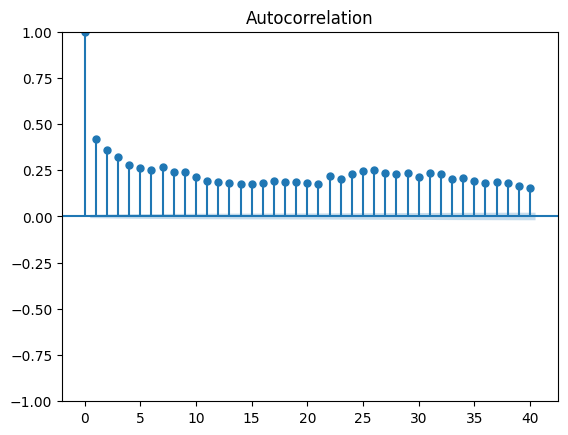

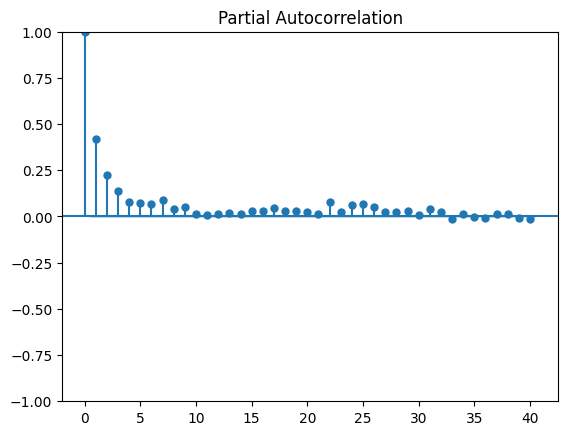

In [ ]:
gcn_predictions = gcn_model.predict([X_test_1, X_test_2], verbose=1)
gcn_predictions = gcn_predictions.reshape(-1, 276)
gcn_predictions = gcn_predictions * a

residuals = Y_test_original - gcn_predictions
rmse = np.sqrt(mean_squared_error(Y_test_original, gcn_predictions))
print("Model RMSE:", rmse)

# Perform ADF test on residuals
def adf_test(residuals):
    result = adfuller(residuals.flatten())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if result[1] <= 0.05:
        print("Reject Null Hypothesis (H0): Time series is stationary")
    else:
        print("Fail to Reject Null Hypothesis (H0): Time series is non-stationary")

# Perform ADF test on residuals
print("Performing ADF test on residuals:")
adf_test(residuals)

# Compute ACF and PACF
acf = sm.graphics.tsa.plot_acf(residuals.flatten(), lags=40, alpha=0.05)
pacf = sm.graphics.tsa.plot_pacf(residuals.flatten(), lags=40, alpha=0.05)

# Display plots
plt.show()

In [ ]:
def train_arima(residuals):
    arima_model = ARIMA(residuals.flatten(), order=(1, 0, 1))  # Adjust the order as needed
    arima_result = arima_model.fit()
    return arima_result

arima_result_on_residuals = train_arima(residuals)
print(arima_result_on_residuals.summary())

# Make ARIMA predictions
arima_predictions = arima_result_on_residuals.predict(start=0, end=len(residuals.flatten())-1)
arima_predictions = arima_predictions.reshape(residuals.shape)

# Combine GCN and ARIMA predictions
final_predictions = gcn_predictions + arima_predictions

evaluate_performance(Y_test_original,final_predictions)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                46920
Model:                 ARIMA(1, 0, 1)   Log Likelihood             -269084.204
Date:                Fri, 05 Jul 2024   AIC                         538176.408
Time:                        17:05:26   BIC                         538211.433
Sample:                             0   HQIC                        538187.412
                              - 46920                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5099      1.398      3.942      0.000       2.770       8.250
ar.L1          0.9237      0.001    672.073      0.000       0.921       0.926
ma.L1         -0.7026      0.002   -282.425      0.0

(74.88959290331324, 0.904101294139774, 44.816570835574424, 0.08667465871067873)

In [ ]:
from keras.callbacks import Callback
class RMSECallback(Callback):
    def __init__(self, X_test_1, X_test_2, Y_test_original):
        self.X_test_1 = X_test_1
        self.X_test_2 = X_test_2
        self.Y_test_original = Y_test_original
        self.rmse = []

    def on_epoch_end(self, epoch, logs=None):
        gcn_predictions = self.model.predict([self.X_test_1, self.X_test_2], verbose=0)
        gcn_predictions = gcn_predictions.reshape(-1, 276)
        gcn_predictions = gcn_predictions * a  # Replace with actual scaling factor if applicable
        residuals = self.Y_test_original - gcn_predictions
        rmse = np.sqrt(mean_squared_error(self.Y_test_original, gcn_predictions))
        self.rmse.append(rmse)
        print(f'Epoch {epoch + 1} RMSE: {rmse}')

rmse_callback = RMSECallback(X_test_1, X_test_2, Y_test_original)

# Train the model with the RMSE callback
history = gcn_model.fit([X_train_1, X_train_2], Y_train, batch_size=64, epochs=80, verbose=1, callbacks=[rmse_callback])

Epoch 1/80
9/9 [==============================] - 0s 38ms/step - loss: 0.0116
Epoch 2/80
9/9 [==============================] - 0s 34ms/step - loss: 0.0115
Epoch 3/80
9/9 [==============================] - 0s 36ms/step - loss: 0.0114
Epoch 4/80
9/9 [==============================] - 0s 35ms/step - loss: 0.0114
Epoch 5/80
9/9 [==============================] - 0s 36ms/step - loss: 0.0113
Epoch 6/80
9/9 [==============================] - 0s 38ms/step - loss: 0.0112
Epoch 7/80
9/9 [==============================] - 0s 27ms/step - loss: 0.0112
Epoch 8/80
9/9 [==============================] - 0s 27ms/step - loss: 0.0111
Epoch 9/80
9/9 [==============================] - 0s 23ms/step - loss: 0.0110
Epoch 10/80
9/9 [==============================] - 0s 24ms/step - loss: 0.0110
Epoch 11/80
9/9 [==============================] - 0s 22ms/step - loss: 0.0109
Epoch 12/80
9/9 [==============================] - 0s 22ms/step - loss: 0.0108
Epoch 13/80
9/9 [==============================] - 0s 23ms/st

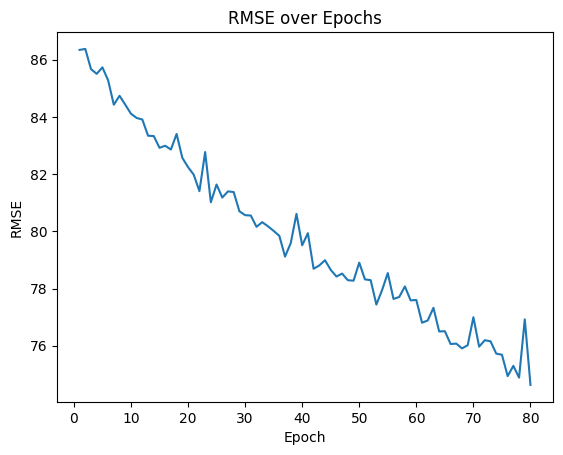

Maximum RMSE 86.3792962655798
Minimum RMSE 74.62850462738908


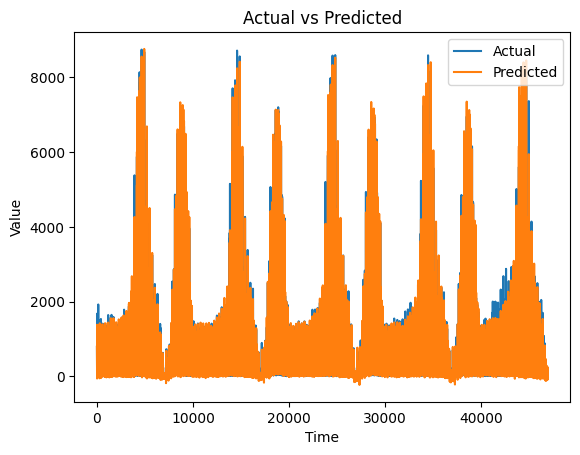

In [ ]:
# Plot RMSE over epochs
plt.plot(range(1, len(rmse_callback.rmse) + 1), rmse_callback.rmse)
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('RMSE over Epochs')
plt.show()

print("Maximum RMSE", max(rmse_callback.rmse))
print("Minimum RMSE",min(rmse_callback.rmse))
# Plot RMSE over epochs for GCN training
rmse_gcn = np.sqrt(mean_squared_error(Y_test_original, gcn_predictions))


# Plot the final combined predictions
plt.plot(Y_test_original.flatten(), label='Actual')
plt.plot(final_predictions.flatten(), label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()